In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector
import matplotlib.cm as cm
from lane_detection import *
from lane_following import *

20.90723357801993
picked new lane! fitness: 20.90723357801993 <---------------------------------------
21.060225950085503
picked new lane! fitness: 21.060225950085503 <---------------------------------------
Strafe Left by 62.42923485183553 turn Left by: -4.677646698740006 degrees


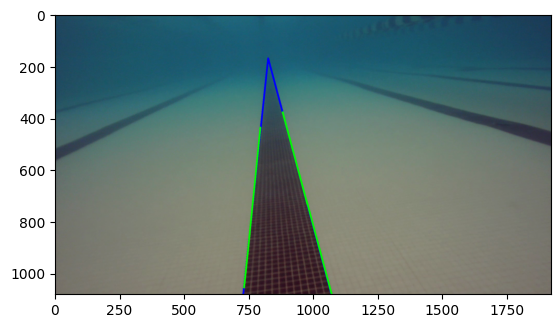

24.692697664712146
picked new lane! fitness: 24.692697664712146 <---------------------------------------
24.62249662222649
24.78081482278842
picked new lane! fitness: 24.78081482278842 <---------------------------------------
24.710613780302758
Strafe Left by 90.3949873568348 turn Left by: -1.5506895190831074 degrees


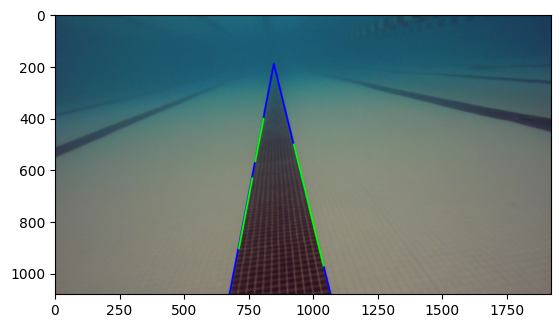

27.24927961210004
picked new lane! fitness: 27.24927961210004 <---------------------------------------
27.039712955160716
27.158235677641386
26.94866902070203
Strafe Left by 115.70276816608998 turn Right by: 1.6054475697834931 degrees


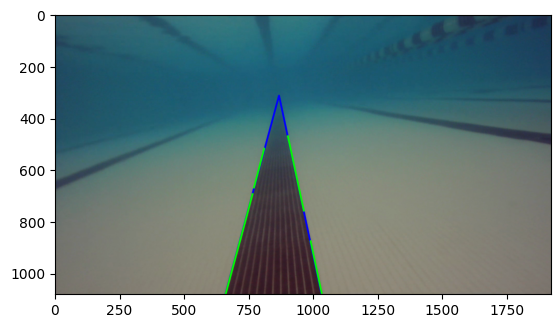

28.18329075324186
picked new lane! fitness: 28.18329075324186 <---------------------------------------
28.171426721820175
Strafe Left by 126.34242476060183 turn Right by: 3.263930969282711 degrees


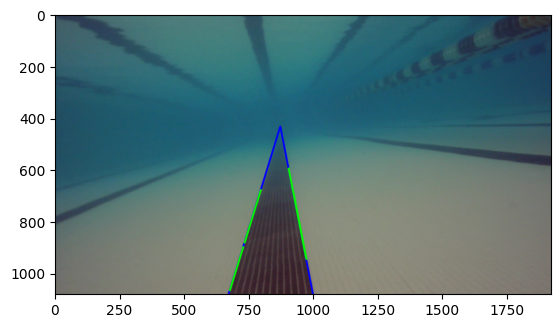

29.003286800203718
picked new lane! fitness: 29.003286800203718 <---------------------------------------
Strafe Left by 134.37587648014858 turn Right by: 1.4856058242441037 degrees


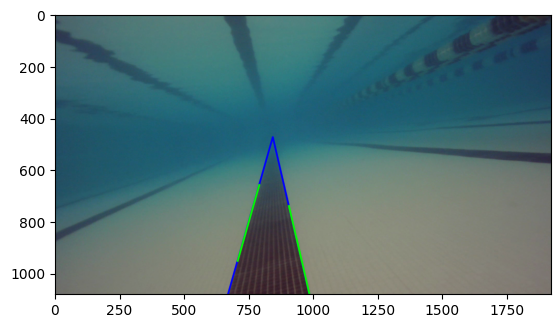

29.67543655342096
picked new lane! fitness: 29.67543655342096 <---------------------------------------
29.589690165006886
29.781610121364135
picked new lane! fitness: 29.781610121364135 <---------------------------------------
29.695863732950073
Strafe Left by 210.09685828116108 turn Right by: 6.488897862365093 degrees


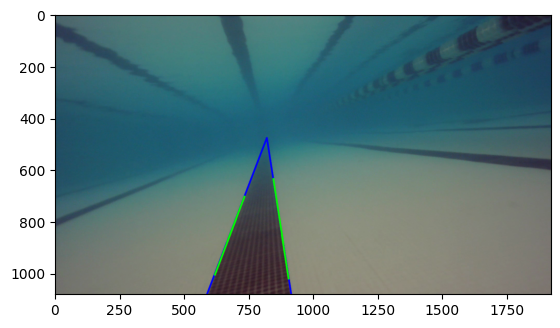

Strafe Left by 210.09685828116108 turn Right by: 6.488897862365093 degrees


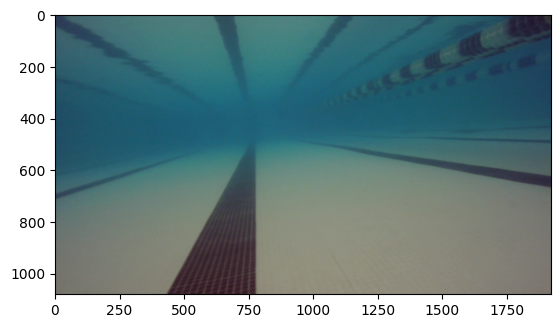

27.991044243977594
picked new lane! fitness: 27.991044243977594 <---------------------------------------
Strafe Left by 447.9647527225886 turn Right by: 19.126707197403846 degrees


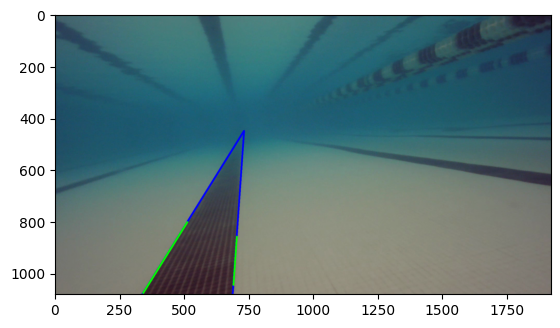

Strafe Left by 447.9647527225886 turn Right by: 19.126707197403846 degrees


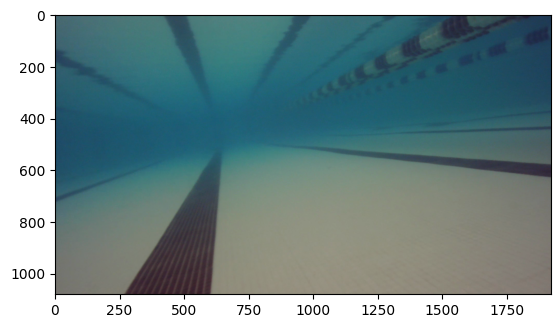

Strafe Left by 447.9647527225886 turn Right by: 19.126707197403846 degrees


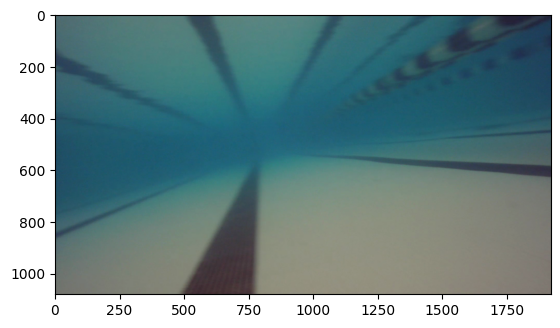

Strafe Left by 447.9647527225886 turn Right by: 19.126707197403846 degrees


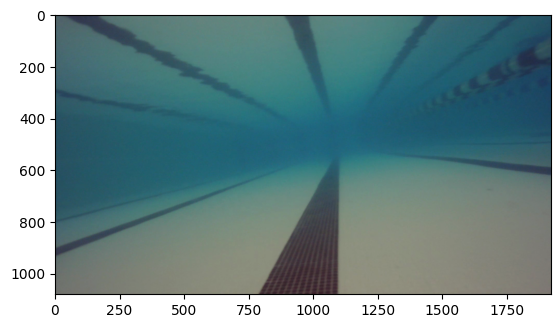

30.778480825034297
picked new lane! fitness: 30.778480825034297 <---------------------------------------
30.69606503012471
Strafe Right by -65.63687881429814 turn Right by: 9.26455849436384 degrees


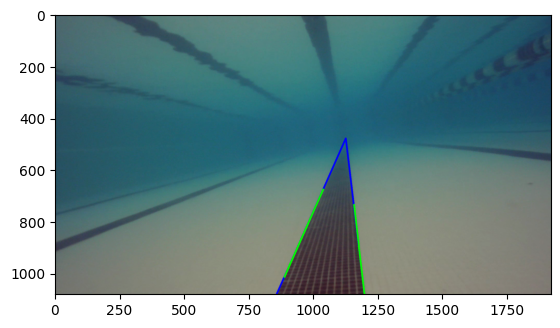

31.995724137094008
picked new lane! fitness: 31.995724137094008 <---------------------------------------
32.60755512388051
picked new lane! fitness: 32.60755512388051 <---------------------------------------
Strafe Right by -85.08340248962668 turn Right by: 5.96940115660442 degrees


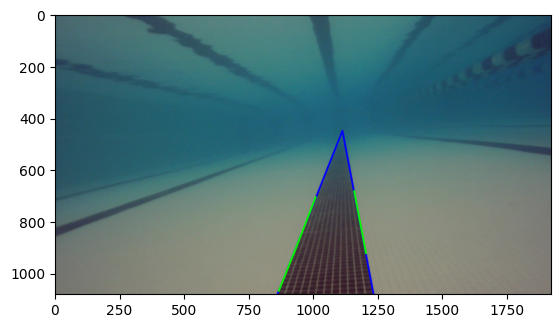

33.07296108109509
picked new lane! fitness: 33.07296108109509 <---------------------------------------
33.00915088426698
33.09603174854006
picked new lane! fitness: 33.09603174854006 <---------------------------------------
33.03222155171194
Strafe Right by -64.66978426644073 turn Right by: 4.868392800743052 degrees


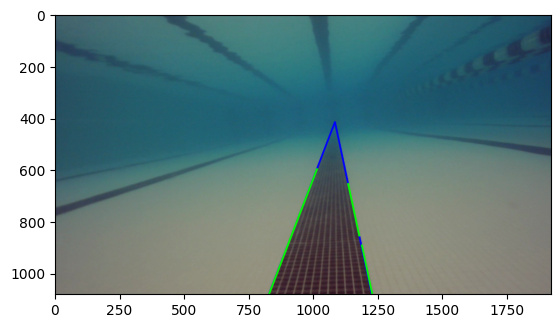

34.11036645367005
picked new lane! fitness: 34.11036645367005 <---------------------------------------
34.953424787994464
picked new lane! fitness: 34.953424787994464 <---------------------------------------
34.98880280064959
picked new lane! fitness: 34.98880280064959 <---------------------------------------
35.83186113497409
picked new lane! fitness: 35.83186113497409 <---------------------------------------
Strafe Right by -42.584336012076506 turn Right by: 3.257737319698265 degrees


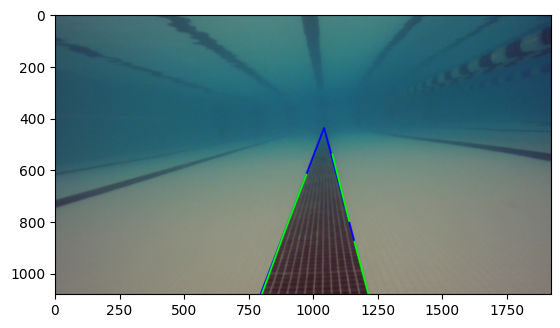

35.964013951865425
picked new lane! fitness: 35.964013951865425 <---------------------------------------
36.025199844228716
picked new lane! fitness: 36.025199844228716 <---------------------------------------
26.26342506918647
9.700588882678952
9.761774775042255
Strafe Right by -25.207151011089422 turn Right by: 1.2448566948901458 degrees


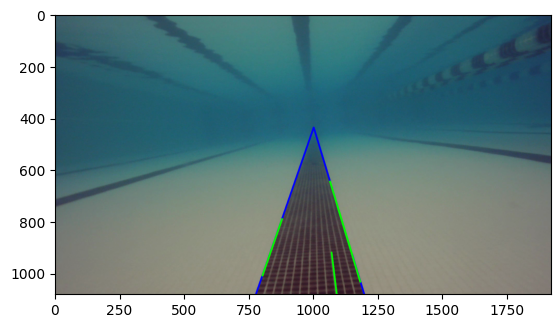

36.09660931700505
picked new lane! fitness: 36.09660931700505 <---------------------------------------
36.24600315611193
picked new lane! fitness: 36.24600315611193 <---------------------------------------
35.887033641871895
36.036427480978794
Strafe Right by -11.603542895995702 turn Right by: 1.0607571525989243 degrees


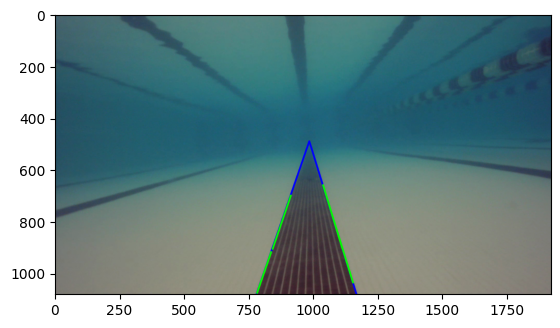

36.16030926081733
picked new lane! fitness: 36.16030926081733 <---------------------------------------
Strafe Left by 21.782154506792267 turn Right by: 1.0266198904675292 degrees


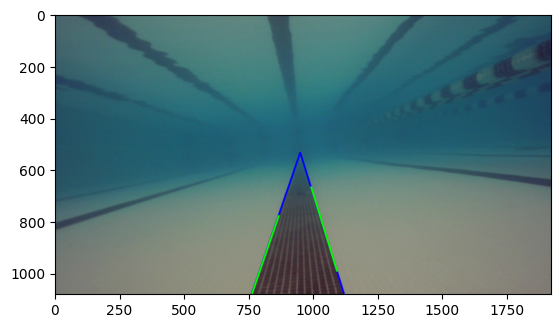

36.00852608989096
picked new lane! fitness: 36.00852608989096 <---------------------------------------
Strafe Left by 75.52678571428567 turn Right by: 3.151496265990076 degrees


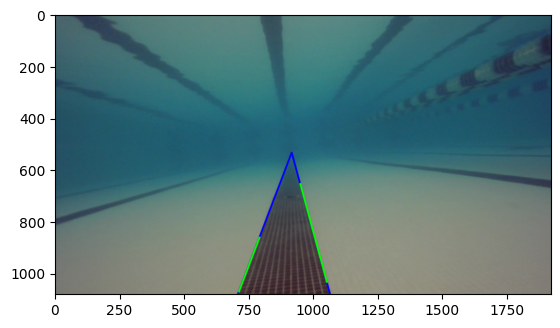

36.092590245665455
picked new lane! fitness: 36.092590245665455 <---------------------------------------
35.85427463887983
Strafe Left by 132.73983083677683 turn Right by: 5.551036865561684 degrees


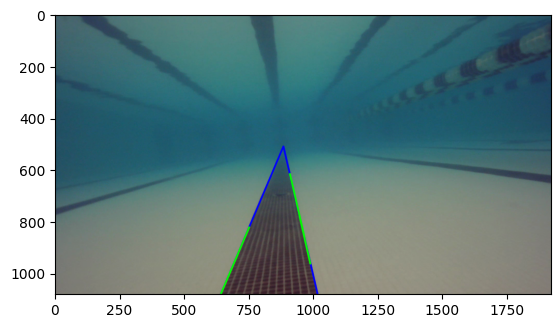

35.1361225750024
picked new lane! fitness: 35.1361225750024 <---------------------------------------
Strafe Left by 195.02106554862462 turn Right by: 9.246510963847768 degrees


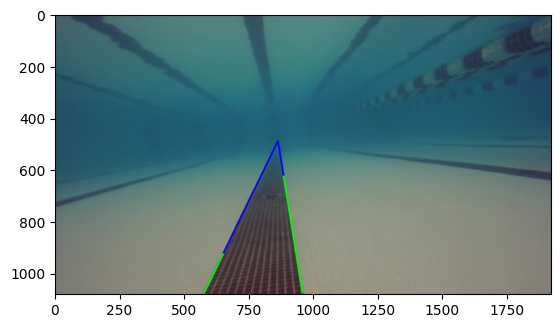

In [8]:
cap = cv2.VideoCapture('AUV_Vid.mkv')

i = 0
ret = True
while ret:
    if i > 300:
        break
    slopeSet = []
    i += 1
    ret, frame = cap.read()
    if(i%1 == 0 and i > 0):
        lines = detect_lines(frame, 50, 90, 5,150,11)
        #print (lines)
    
        #try: 
        #    frame = draw_lines(frame, lines,(0, 255, 0))
        #    print ("tried to draw lines")
        #except :
       #     pass
        try:
            lanes = detect_lanes(lines)
            #print ("tried to detect lanes")
            pickedLane = pick_lane(lanes)
            frame = draw_Single_lane(frame, pickedLane, (255, 0, 0))
            frame = draw_lines(frame, lines,(0, 255, 0))
        except:
            pass
        center_intercept, center_slope = get_lane_center(pickedLane)
        print(recommend_direction(center_intercept, center_slope))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.show()
